In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy
from numpy.linalg import inv
from numpy.random import randint
%matplotlib notebook
from matplotlib import pyplot
from scripts.plot_helper import *   # plot_vector, plot_linear_transformation, plot_linear_transformations

- What is a vector?
    - a list of numbers where the order is important:
        - example: a student's information vector (height(ft), weight(lb), age): (6.1, 170, 25), cannot change the order
    - an arrow which is determined by a magnitude and a direction
        - example: a vector (2,2), to draw a vector on a 2d coordinate system, we usually place the tail of the arrow at the origin. However, changing the position of the tail will not affect the magitude or direction of the vector. The list of number (2,2) describe how to reach the head of the arrow starting from the tail.

<IPython.core.display.Javascript object>


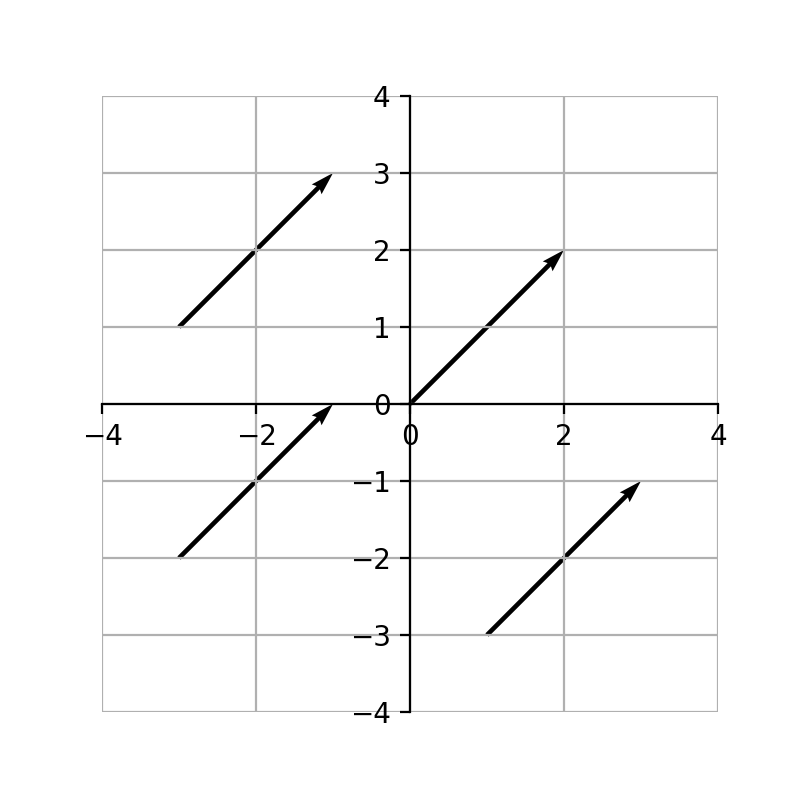

In [3]:
vectors = [(2,2)]
tails = [(-3,-2), (-3,1), (0,0), (1,-3)]
plot_vector(vectors, tails)

- Vector operations:
    - add: $\vec{a} + \vec{b}$
    - multiply by a scalar: $ 2\vec{a} $
    - together: linear combinations $m\vec{a} + n\vec{b}$

<IPython.core.display.Javascript object>


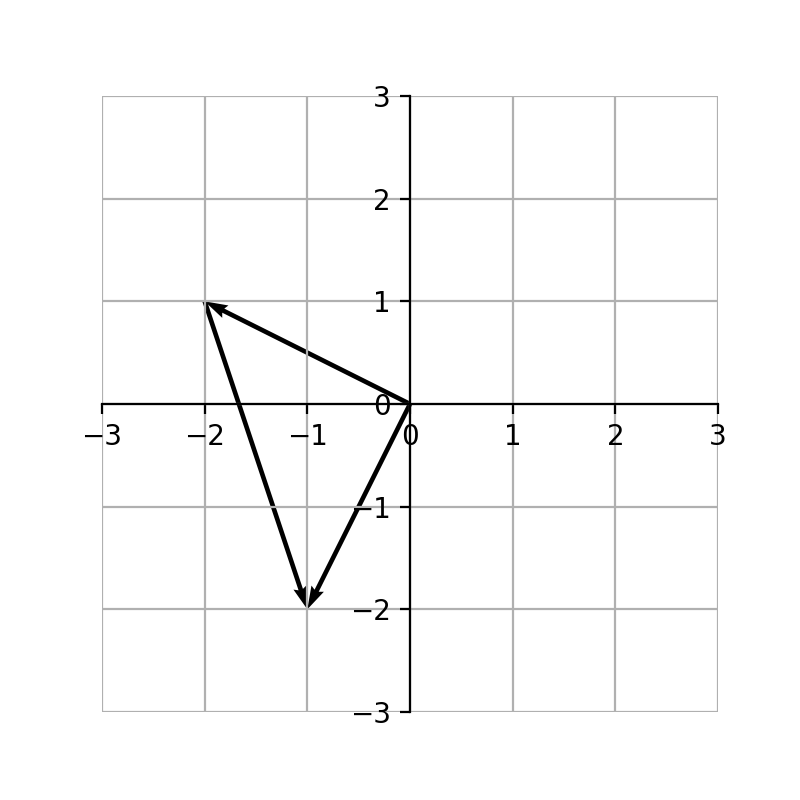

<IPython.core.display.Javascript object>


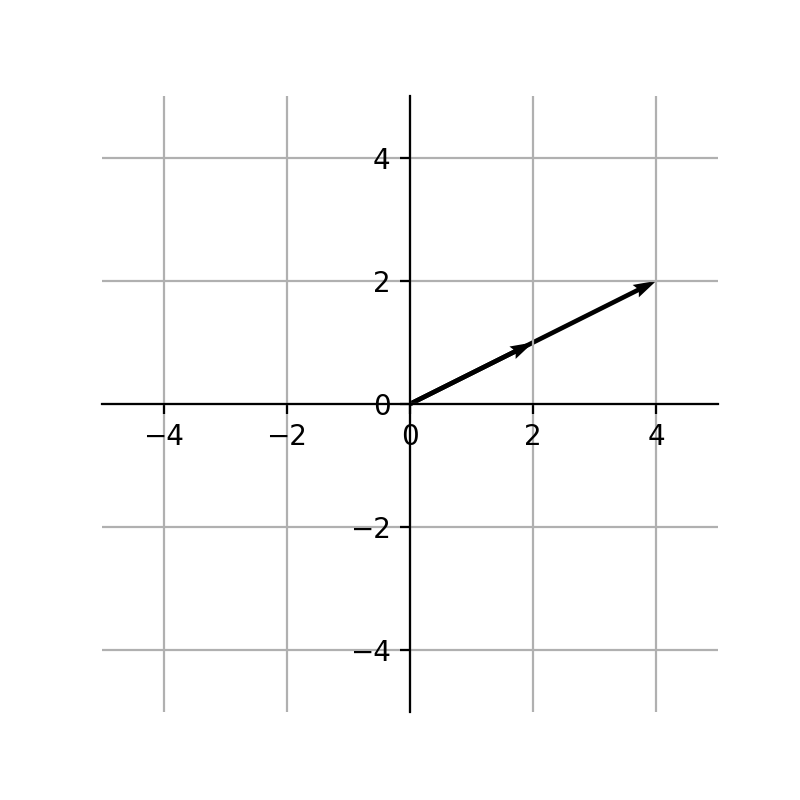

In [4]:
# vector addition
a = numpy.array((-2,1))
b = numpy.array((1,-3))
origin = numpy.array((0,0))
vectors = [a, b, a+b]
tails = [origin, a, origin]
plot_vector(vectors, tails)
# vector scaling
c = numpy.array((2,1))
vectors = [c, 2*c]
plot_vector(vectors)

- Basis Vector
    - if we define: $\hat{i} = (1,0), \hat{j} = (0,1)$, then vector $(3,2)$ is a linear combination of $\hat{i}$ and $\hat{j}$:  $3\hat{i} + 2\hat{j}$

<IPython.core.display.Javascript object>


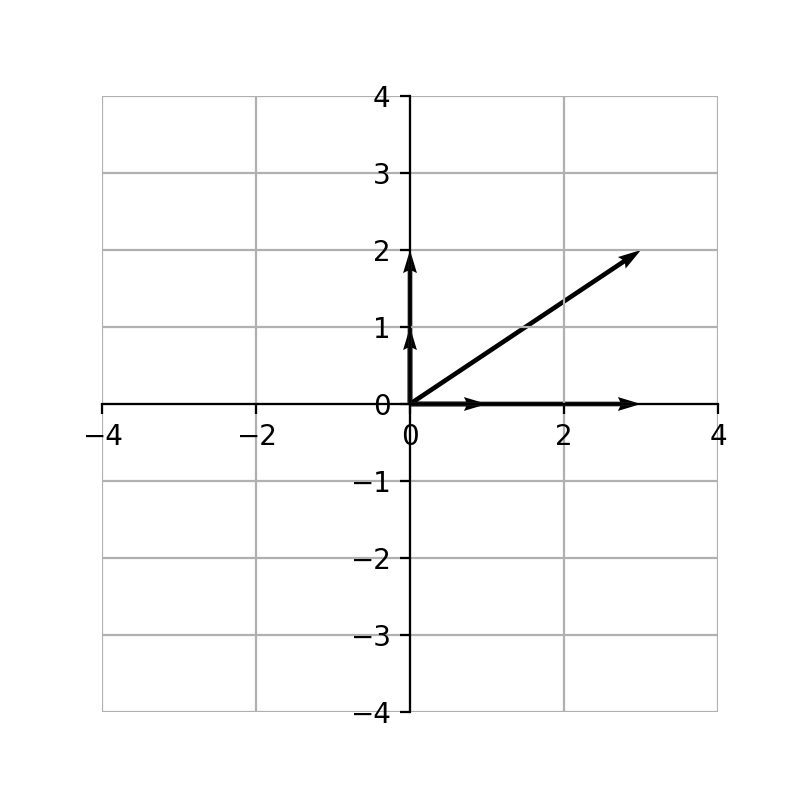

In [5]:
# basis vector
i = numpy.array((1,0))
j = numpy.array((0,1))
vec = 3*i + 2*j
vectors = [i, j, 3*i, 2*j, vec]
plot_vector(vectors)

- span of two vectors is the set of their linear combinations

<IPython.core.display.Javascript object>


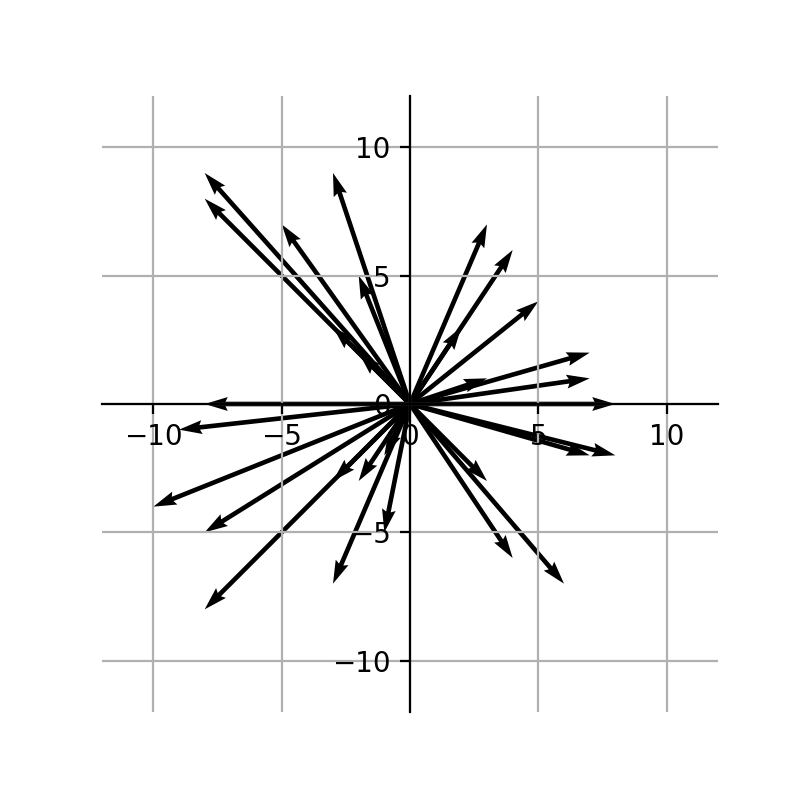

In [6]:
# span
vectors = []
i = numpy.array((1,0))
j = numpy.array((0,1))
for _ in range(30):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)
plot_vector(vectors)    

From now on we only draw the tip (head) of the vector for simplicity.

- What is a matrix?
    - A matrix describes a linear transformation 

<IPython.core.display.Javascript object>


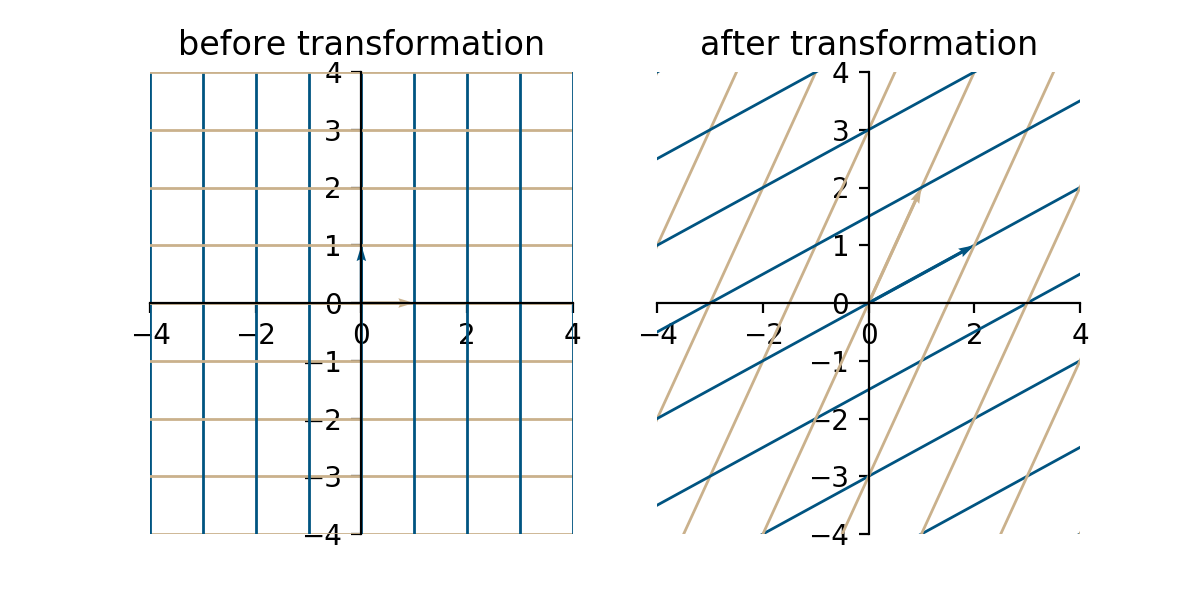

In [7]:
matrix = [[1,2], [2,1]]
matrix = numpy.array(matrix)
plot_linear_transformation(matrix)

$ M = \begin{bmatrix} 1 & 2 \\
                      2 & 1 \end{bmatrix} $

The basis $\hat{i}$ lands at $(1,2)^T$ and basis $\hat{j}$ lands at $(2,1)^T$ after the transformation.

$$
\begin{equation}
\hat{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 2 \end{bmatrix} \\
\hat{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 1 \end{bmatrix}
\end{equation}
$$

- Matrix-Matrix multiplication:
 a combination of two linear tranformations

In [8]:
shear = numpy.array([[1,1], [0,1]])
rotation = numpy.array([[0,-1], [1,0]])

<IPython.core.display.Javascript object>


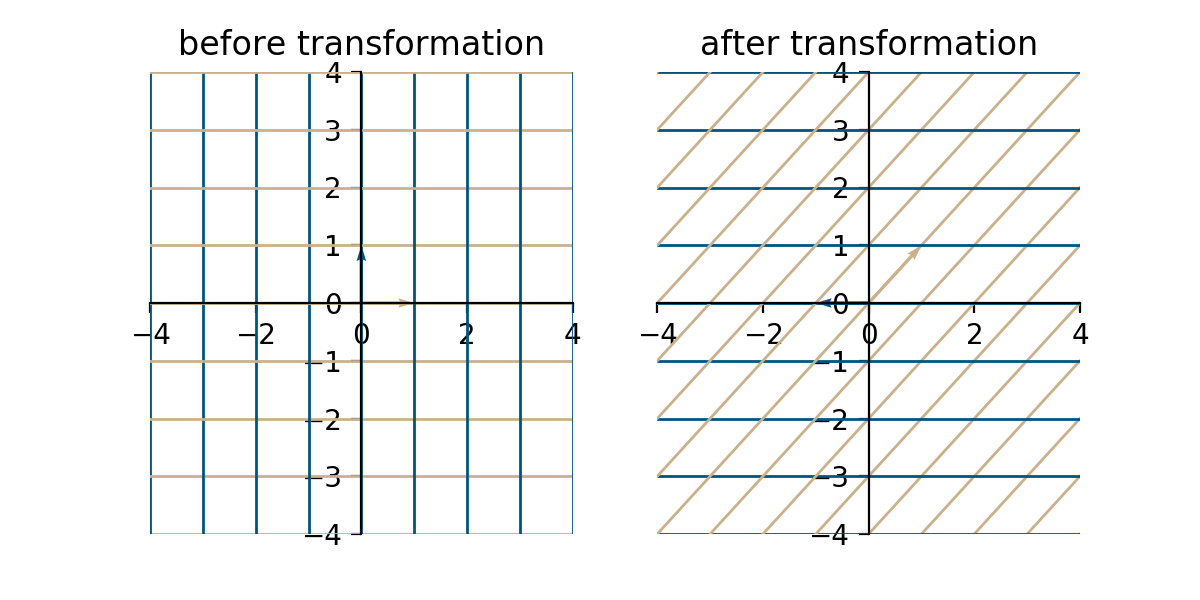

In [9]:
plot_linear_transformation(shear@rotation)

<IPython.core.display.Javascript object>


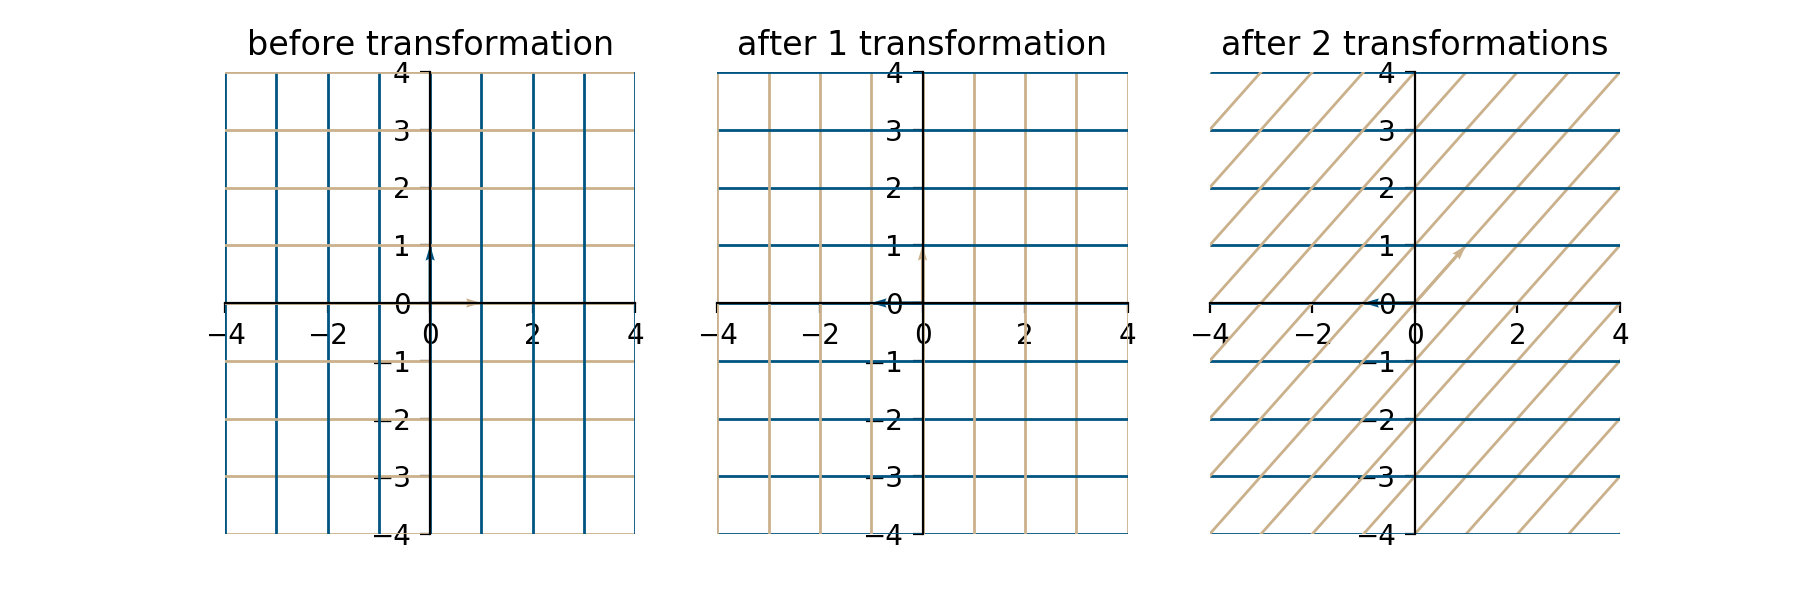

In [10]:
plot_linear_transformations(rotation, shear)  # the order of transformation: from right to left

note: `shear@rotation != rotation@shear` the order of transformations is important. Matrix mulitiplication is not commutative.

- Inverse of a matrix:

<IPython.core.display.Javascript object>


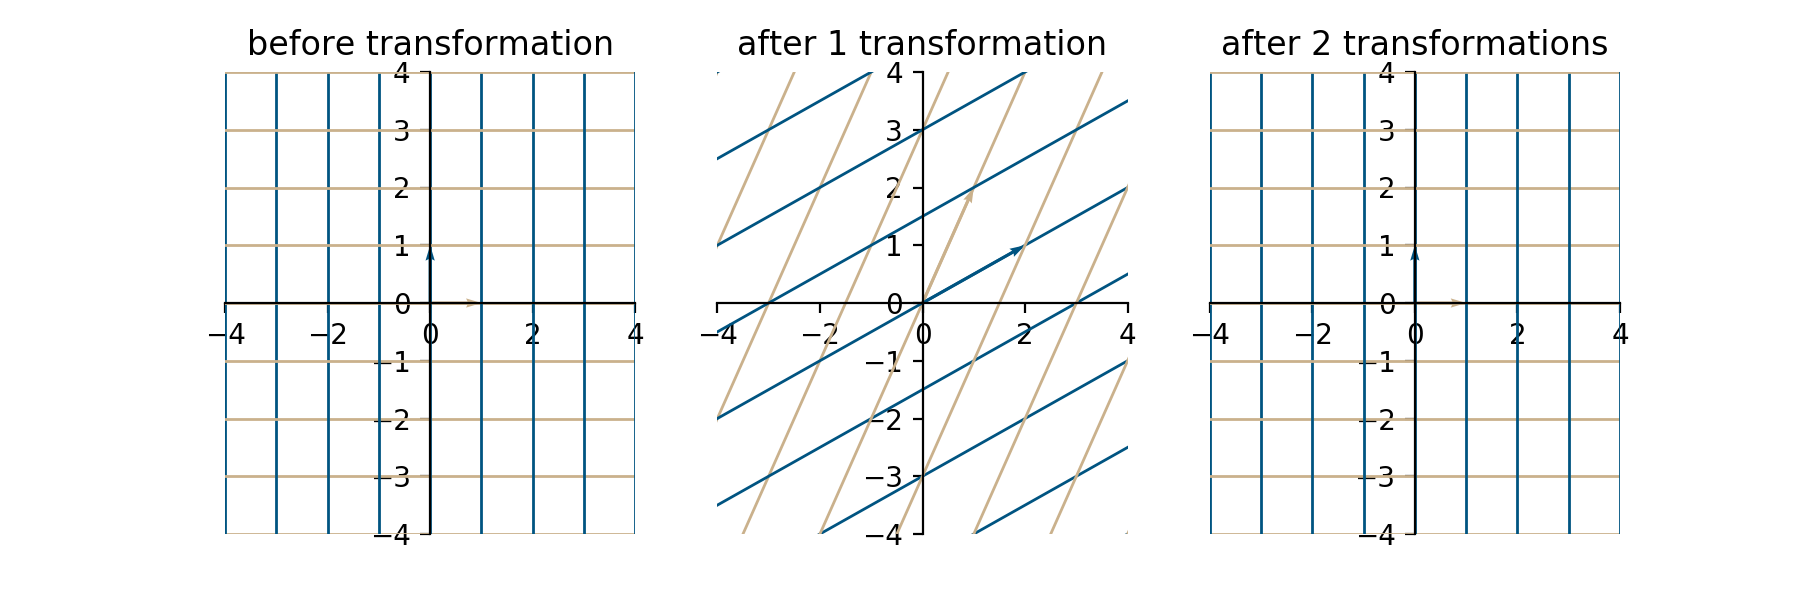

In [11]:
A = numpy.array([[1,2], [2,1]])
A_inv = inv(A)
plot_linear_transformations(A, A_inv)

In [12]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = '../style/custom.css'
HTML(open(css_file, "r").read())